In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!mkdir dataset

In [ ]:
cd /kaggle/working/dataset

In [ ]:
!bash /kaggle/input/open-nuro-alzhimer-bash-script/ds004504-1.0.6.sh


# The sampling rate is 500 Hz with 10uV/mm resolution.
# Each recording lasted approximately 13.5 minutes for AD group (min=5.1, max=21.3), 12 minutes for FTD group (min=7.9, max=16.9) and 13.8 for CN group (min=12.5, max=16.5). 
# In total, 485.5 minutes of AD, 276.5 minutes of FTD and 402 minutes of CN recordings were collected and are included in the dataset.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_4278/810822352.py:8: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Using matplotlib as 2D backend.


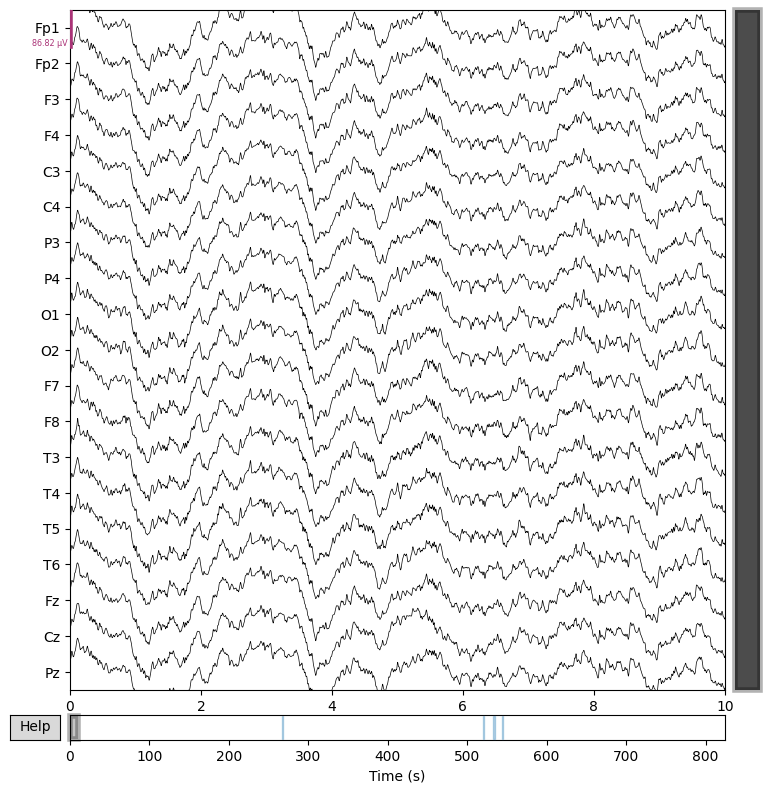

In [1]:
import mne
import matplotlib.pyplot as plt

# Path to your .set file
file_path = '/kaggle/working/dataset/derivatives/sub-081/eeg/sub-081_task-eyesclosed_eeg.set'

# Load the .set file
raw = mne.io.read_raw_eeglab(file_path, preload=True)

# Plot EEG data using Matplotlib
raw.plot(scalings='auto', n_channels=30, title='EEG Data', show=False)

# Show the plot
plt.show()

# split the data into epoch of 30 sec 

In [5]:
#use this one
import os
import pandas as pd
import mne
import numpy as np

# Define your data directory
data_directory = '/kaggle/working/dataset'

# Generate a list of file paths for EEG data for subjects 1 to 85
file_paths = [
    os.path.join(data_directory, f'sub-{subject_number:03d}/eeg/sub-{subject_number:03d}_task-eyesclosed_eeg.set')
    for subject_number in range(1, 86)
]

# Load labels from participants.tsv
participants_file = '/kaggle/working/dataset/participants.tsv'
participants_df = pd.read_csv(participants_file, sep='\t')

# Extract labels from the 'group' column
labels_dict = dict(zip(participants_df['participant_id'], participants_df['Group']))

# Create empty lists to store epochs and labels
all_epochs = []
all_labels = []

for file_path in file_paths:
    # Load each .set file using MNE-Python
    raw = mne.io.read_raw_eeglab(file_path, preload=True)

    # Specify the duration of each epoch in seconds (e.g., 30 seconds)
    epoch_duration = 30

    # Create events array to mark the beginning of each epoch
    events = mne.make_fixed_length_events(raw, duration=epoch_duration)

    # Create Epochs object from your data using the events
    epochs = mne.Epochs(raw, events, tmin=0, tmax=epoch_duration, baseline=None, preload=True)

    # Convert epochs data to a numpy array
    epoch_data = epochs.get_data()

    # Get label for the subject from the dictionary
    subject_number = int(file_path.split('/')[4].split('-')[1])
    label = labels_dict[f'sub-{subject_number:03d}']

    # Append epoch data and labels to the lists
    all_epochs.append(epoch_data)
    all_labels.extend([label] * len(epochs))  # Repeat labels for each epoch

# Concatenate all epoch data into a single 3D numpy array
all_epochs_array = np.concatenate(all_epochs, axis=0)

# Now 'all_epochs_array' contains the epochs in a 3D array
# Its dimensions are (total_epochs, channels, time_points)
# 'all_labels' contains all the corresponding labels for each epoch

# You can perform further processing, analysis, or model training using 'all_epochs_array' and 'all_labels'


Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 19 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 10 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 23 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 15001 original time po

In [ ]:
print("Number of samples in all_time_domain_features_array:", all_epochs_array.shape[0])
print("Number of samples in encoded_labels:", encoded_labels.shape[0])


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Encode string labels into numerical values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(all_labels)

In [ ]:
import numpy as np

# Saving the EEG data (all_epochs_array) as a .npy file
np.save('/kaggle/working/all_epochs_array.npy', all_epochs_array)


np.save('/kaggle/working/all_lebles_encoded.npy', encoded_labels)



In [ ]:
!rm /kaggle/working/all_lebles_encoded.npy
!rm /kaggle/working/all_lebles_encoded_cleaned.npy
!rm /kaggle/working/all_epochs_array.npy
!rm /kaggle/working/all_epochs_array_cleaned.npy

# split the cleaned data into epoch of 30 sec 

In [6]:
#use this one
import os
import pandas as pd
import mne
import numpy as np

# Define your data directory
data_directory = '/kaggle/working/dataset/derivatives'

# Generate a list of file paths for EEG data for subjects 1 to 85
file_paths = [
    os.path.join(data_directory, f'sub-{subject_number:03d}/eeg/sub-{subject_number:03d}_task-eyesclosed_eeg.set')
    for subject_number in range(1, 86)
]

# Load labels from participants.tsv
participants_file = '/kaggle/working/dataset/participants.tsv'
participants_df = pd.read_csv(participants_file, sep='\t')

# Extract labels from the 'group' column
labels_dict = dict(zip(participants_df['participant_id'], participants_df['Group']))

# Create empty lists to store epochs and labels
all_epochs_cleaned = []
all_labels = []

for file_path in file_paths:
    # Load each .set file using MNE-Python
    raw = mne.io.read_raw_eeglab(file_path, preload=True)

    # Specify the duration of each epoch in seconds (e.g., 30 seconds)
    epoch_duration = 30

    # Create events array to mark the beginning of each epoch
    events = mne.make_fixed_length_events(raw, duration=epoch_duration)

    # Create Epochs object from your data using the events
    epochs = mne.Epochs(raw, events, tmin=0, tmax=epoch_duration, baseline=None, preload=True)

    # Convert epochs data to a numpy array
    epoch_data = epochs.get_data()

    # Get label for the subject from the dictionary
    subject_number = int(file_path.split('/')[5].split('-')[1])
    label = labels_dict[f'sub-{subject_number:03d}']

    # Append epoch data and labels to the lists
    all_epochs_cleaned.append(epoch_data)
    all_labels.extend([label] * len(epochs))  # Repeat labels for each epoch

# Concatenate all epoch data into a single 3D numpy array
all_epochs_array_cleaned = np.concatenate(all_epochs_cleaned, axis=0)

# Now 'all_epochs_array' contains the epochs in a 3D array
# Its dimensions are (total_epochs, channels, time_points)
# 'all_labels' contains all the corresponding labels for each epoch

# You can perform further processing, analysis, or model training using 'all_epochs_array' and 'all_labels'


Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 19 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 10 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 23 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 21 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 25 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 42 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 25 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 31 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 25 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 18 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 23 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 25 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 25 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 32 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 25 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 25 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 25 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 18 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 21 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 19 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 21 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 21 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
33 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 33 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 23 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 25 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 21 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 18 events and 15001 original time points ...
0 bad epochs dropped


/tmp/ipykernel_4278/2811231970.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Encode string labels into numerical values
label_encoder = LabelEncoder()
encoded_labels_cleaned = label_encoder.fit_transform(all_labels)

In [ ]:
print("Number of samples in all_time_domain_features_array:", all_epochs_array_cleaned.shape[0])
print("Number of samples in encoded_labels:", encoded_labels_cleaned.shape[0])


In [ ]:
import numpy as np

# Saving the EEG data (all_epochs_array) as a .npy file
np.save('/kaggle/working/all_epochs_array_cleaned.npy', all_epochs_array_cleaned)


np.save('/kaggle/working/all_lebles_encoded_cleaned.npy', encoded_labels_cleaned)



# prediction based on extracted time-Domain Features 
# * mean
# * std deviation
# * Kurtosis

In [1]:
import numpy as np
all_epochs_array = np.load('/kaggle/working/all_epochs_array.npy')

encoded_labels = np.load('/kaggle/working/all_lebles_encoded.npy')

In [2]:
import numpy as np
all_epochs_array_cleaned = np.load('/kaggle/working/all_epochs_array_cleaned.npy')

encoded_labels_cleaned = np.load('/kaggle/working/all_lebles_encoded_cleaned.npy')

In [7]:
import numpy as np
from scipy.stats import kurtosis, skew

# Assuming 'all_epochs_array' contains your EEG data in the shape (epochs, channels, time_points)

# Define a function to extract time-domain features
def extract_time_domain_features(epoch_data):
    # Calculate mean, standard deviation, skewness, and kurtosis along the time axis
    mean_values = np.mean(epoch_data, axis=2)
    std_dev_values = np.std(epoch_data, axis=2)
    skewness_values = skew(epoch_data, axis=2)
    kurtosis_values = kurtosis(epoch_data, axis=2)

    # Combine all features into a single array
    time_domain_features = np.concatenate((mean_values, std_dev_values, skewness_values, kurtosis_values), axis=1)
    
    return time_domain_features

# Extract time-domain features for all epochs
all_time_domain_features = []

for epoch_data in all_epochs:
    epoch_time_domain_features = extract_time_domain_features(epoch_data)
    all_time_domain_features.append(epoch_time_domain_features)

# Convert the list of features into a single numpy array
all_time_domain_features_array = np.concatenate(all_time_domain_features, axis=0)

# 'all_time_domain_features_array' now contains time-domain features for all epochs
# Each row represents the features for a specific epoch (mean, std dev, skewness, kurtosis for each channel)


In [ ]:
all_time_domain_features_array.shape

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Assuming 'all_time_domain_features_array' contains the extracted time-domain features
# 'all_labels' contains the corresponding labels (Alzheimer's, dementia, or normal)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_time_domain_features_array, encoded_labels, test_size=0.2, random_state=42)

# Normalize the features (optional but often beneficial for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.75      0.65       196
           1       0.56      0.52      0.54       166
           2       0.58      0.29      0.38        87

    accuracy                           0.57       449
   macro avg       0.57      0.52      0.53       449
weighted avg       0.57      0.57      0.56       449



In [ ]:
print("Number of samples in all_time_domain_features_array:", all_time_domain_features_array.shape[0])
print("Number of samples in encoded_labels:", encoded_labels.shape[0])


# Cleaned data

In [9]:
import numpy as np
from scipy.stats import kurtosis, skew

# Assuming 'all_epochs_array' contains your EEG data in the shape (epochs, channels, time_points)

# Define a function to extract time-domain features
def extract_time_domain_features(epoch_data):
    # Calculate mean, standard deviation, skewness, and kurtosis along the time axis
    mean_values = np.mean(epoch_data, axis=2)
    std_dev_values = np.std(epoch_data, axis=2)
    skewness_values = skew(epoch_data, axis=2)
    kurtosis_values = kurtosis(epoch_data, axis=2)

    # Combine all features into a single array
    time_domain_features = np.concatenate((mean_values, std_dev_values, skewness_values, kurtosis_values), axis=1)
    
    return time_domain_features

# Extract time-domain features for all epochs
all_time_domain_features = []

for epoch_data in all_epochs_cleaned:
    epoch_time_domain_features = extract_time_domain_features(epoch_data)
    all_time_domain_features.append(epoch_time_domain_features)

# Convert the list of features into a single numpy array
all_time_domain_features_array_cleaned = np.concatenate(all_time_domain_features, axis=0)

# 'all_time_domain_features_array' now contains time-domain features for all epochs
# Each row represents the features for a specific epoch (mean, std dev, skewness, kurtosis for each channel)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Assuming 'all_time_domain_features_array' contains the extracted time-domain features
# 'all_labels' contains the corresponding labels (Alzheimer's, dementia, or normal)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_time_domain_features_array_cleaned, encoded_labels_cleaned, test_size=0.2, random_state=42)

# Normalize the features (optional but often beneficial for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.79      0.64       196
           1       0.54      0.49      0.51       137
           2       0.81      0.23      0.36       111

    accuracy                           0.56       444
   macro avg       0.63      0.50      0.51       444
weighted avg       0.61      0.56      0.53       444



In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(all_epochs_array, encoded_labels, test_size=0.2, random_state=42)

# Reshape the data for CNN input (assuming EEG data is arranged as [epochs, channels, time_points])
# CNN expects input shape as [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 units for three classes and softmax activation

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, to_categorical(y_train), epochs=10, batch_size=16, validation_data=(X_test, to_categorical(y_test)))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, to_categorical(y_test))
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Print the classification report for multi-class classification
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
print(classification_report(y_test, predicted_labels))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/10
112/112 [==============================] - 13s 35ms/step - loss: 1.0705 - accuracy: 0.4185 - val_loss: 1.0485 - val_accuracy: 0.4388
Epoch 2/10
112/112 [==============================] - 2s 17ms/step - loss: 1.0278 - accuracy: 0.4849 - val_loss: 1.0011 - val_accuracy: 0.4855
Epoch 3/10
112/112 [==============================] - 2s 17ms/step - loss: 0.9410 - accuracy: 0.5603 - val_loss: 0.9018 - val_accuracy: 0.5679
Epoch 4/10
112/112 [==============================] - 2s 17ms/step - loss: 0.8163 - accuracy: 0.6356 - val_loss: 0.8687 - val_accuracy: 0.5791
Epoch 5/10
112/112 [==============================] - 2s 17ms/step - loss: 0.7138 - accuracy: 0.7031 - val_loss: 0.7284 - val_accuracy: 0.6882
Epoch 6/10
112/112 [==============================] - 2s 17ms/step - loss: 0.5817 - accuracy: 0.7606 - val_loss: 0.6753 - val_accuracy: 0.7038
Epoch 7/10
112/112 [==============================] - 2s 17ms/step - loss: 0.5562 - accuracy: 0.7768 - val_loss: 0.6270 - val_accuracy: 0.737

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(all_epochs_array_cleaned, encoded_labels_cleaned, test_size=0.2, random_state=41)

# Reshape the data for CNN input (assuming EEG data is arranged as [epochs, channels, time_points])
# CNN expects input shape as [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 units for three classes and softmax activation

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
# Train the model
history = model.fit(X_train, to_categorical(y_train), epochs=10, batch_size=32, validation_data=(X_test, to_categorical(y_test)))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, to_categorical(y_test))
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Print the classification report for multi-class classification
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
print(classification_report(y_test, predicted_labels))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 17, 64)            2880256   
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 8, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 6, 128)            24704     
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 3, 128)            0         
 g1D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 384)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Flatten the 3D array to 2D (samples x features)
n_samples, n_epochs, n_features = all_epochs_array.shape
flattened_data = all_epochs_array.reshape(n_samples, -1)

# Reduce dimensionality using PCA
pca = PCA(n_components=100)  # Adjust the number of components as needed
reduced_data = pca.fit_transform(flattened_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reduced_data, encoded_labels, test_size=0.2, random_state=42)

# Initialize LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit LDA classifier on the training data
lda.fit(X_train, y_train)

# Predict labels for test data
y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Flatten the 3D array to 2D (samples x features)
n_samples, n_epochs, n_features = all_epochs_array_cleaned.shape
flattened_data = all_epochs_array_cleaned.reshape(n_samples, -1)

# Reduce dimensionality using PCA
pca = PCA(n_components=100)  # Adjust the number of components as needed
reduced_data = pca.fit_transform(flattened_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reduced_data, encoded_labels_cleaned, test_size=0.2, random_state=42)

# Initialize LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit LDA classifier on the training data
lda.fit(X_train, y_train)

# Predict labels for test data
y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# spectograms and 2d conv

In [3]:
from scipy import signal
import matplotlib.pyplot as plt

# Assuming `all_epochs_array` contains the EEG data in shape (epochs, channels, timepoints)

# Define function to convert EEG data into spectrograms
def create_spectrogram(epoch_data):
    spectrograms = []
    for epoch in epoch_data:
        epoch_spectrograms = []
        for channel in epoch:
            f, t, Sxx = signal.spectrogram(channel, fs=50)
            epoch_spectrograms.append(Sxx)
        spectrograms.append(np.array(epoch_spectrograms))
    return np.array(spectrograms)

# Convert EEG data into spectrograms
spectrograms = create_spectrogram(all_epochs_array)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


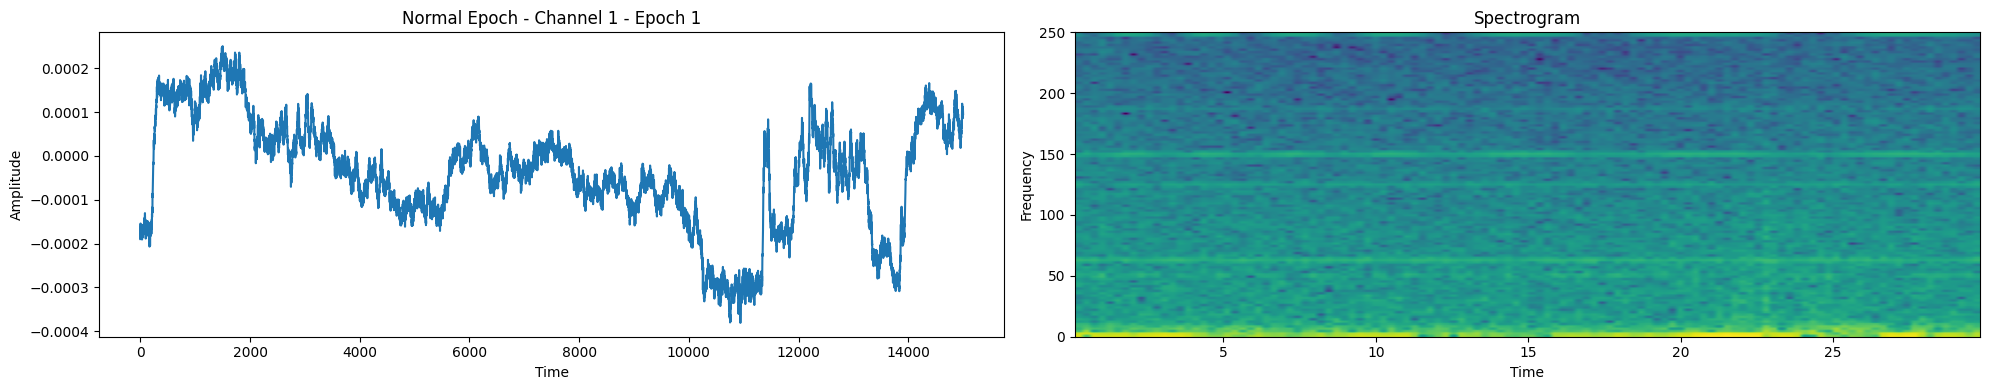

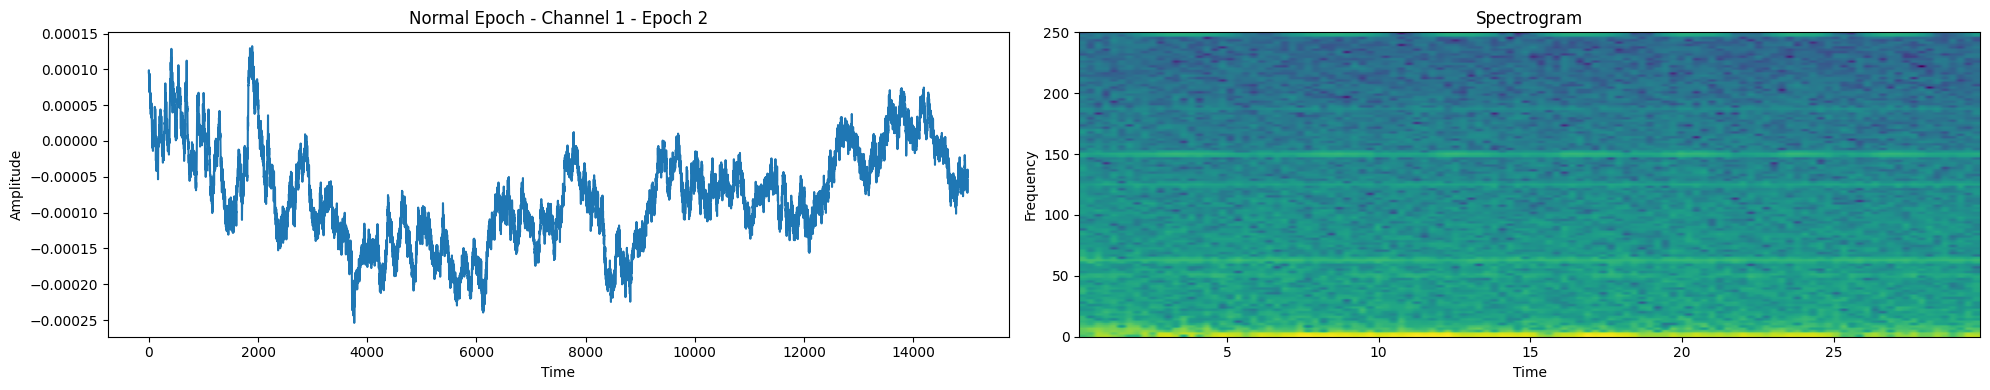

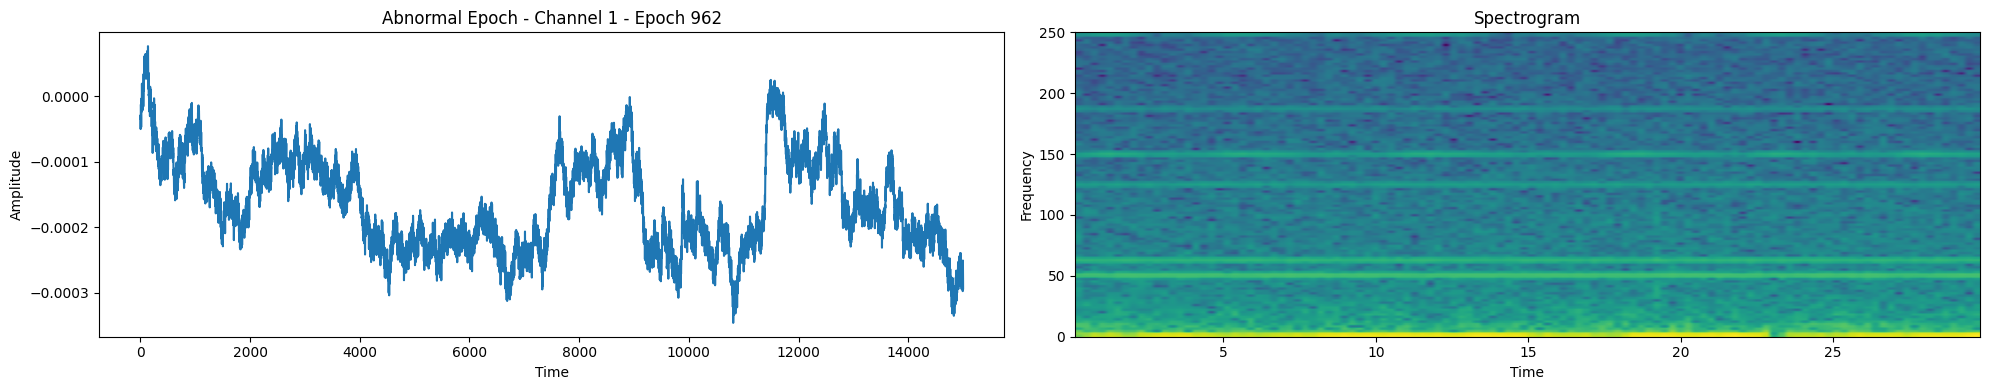

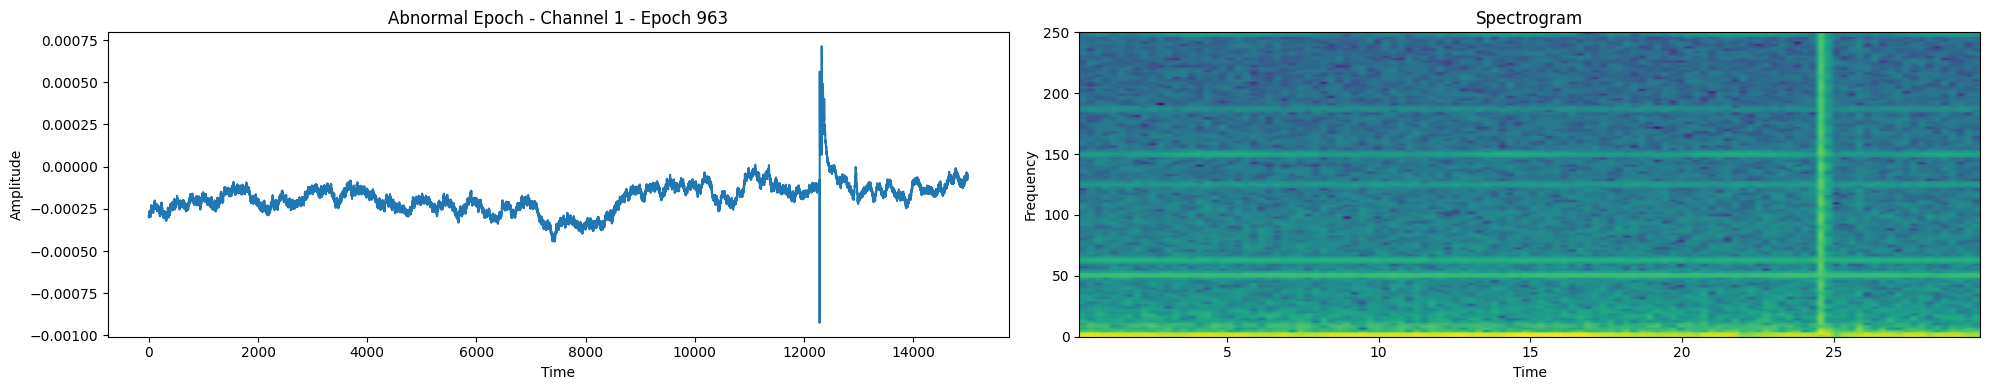

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'spectrograms' contains the transformed data and 'all_labels' contains the corresponding labels

num_epochs_to_visualize = 2  # Number of epochs to visualize
num_epochs_to_visualize_per_category = 2

# Find indices of epochs labeled as 'Normal' and 'Alzheimer's/Dementia'
# Get indices of epochs for normal and Alzheimer's categories
normal_indices = [idx for idx, label in enumerate(encoded_labels) if label == 0][:num_epochs_to_visualize_per_category]
abnormal_indices = [idx for idx, label in enumerate(encoded_labels) if label == 1][:num_epochs_to_visualize_per_category]
# Visualize the raw EEG data for the specified epochs of each type

epochs_to_visualize = normal_indices[:num_epochs_to_visualize] + abnormal_indices[:num_epochs_to_visualize]

for epoch_idx in epochs_to_visualize:
    plt.figure(figsize=(20, 4))

    # Plotting the raw EEG data
    plt.subplot(121)
    plt.plot(all_epochs_array[epoch_idx][0])  # Plotting the first channel's raw EEG data
    if epoch_idx in normal_indices:
        plt.title(f'Normal Epoch - Channel 1 - Epoch {epoch_idx+1}')
    else:
        plt.title(f'Abnormal Epoch - Channel 1 - Epoch {epoch_idx+1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Plotting the spectrogram
    plt.subplot(122)
    plt.specgram(all_epochs_array[epoch_idx][0], Fs=500)  # Assuming 'sample_rate' is defined
    plt.title('Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'spectrograms' contains the transformed data and 'all_labels' contains the corresponding labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spectrograms, encoded_labels, test_size=0.2, random_state=42)


# Normalize spectrograms
X_train = X_train / np.max(X_train)
X_test = X_test / np.max(X_test)


# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(spectrograms.shape[1], spectrograms.shape[2], spectrograms.shape[3])),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes: Alzheimer's, Normal, Dementia
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

predictions = model.predict(X_test)

# Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate the classification report
report = classification_report(y_test, predicted_labels)
print("Classification Report:\n", report)

Epoch 1/20
56/56 [==============================] - 10s 35ms/step - loss: 1.0716 - accuracy: 0.4085 - val_loss: 1.0500 - val_accuracy: 0.4365
Epoch 2/20
56/56 [==============================] - 1s 15ms/step - loss: 1.0672 - accuracy: 0.4269 - val_loss: 1.0503 - val_accuracy: 0.4365
Epoch 3/20
56/56 [==============================] - 1s 15ms/step - loss: 1.0636 - accuracy: 0.4280 - val_loss: 1.0568 - val_accuracy: 0.4365
Epoch 4/20
56/56 [==============================] - 1s 15ms/step - loss: 1.0589 - accuracy: 0.4291 - val_loss: 1.0528 - val_accuracy: 0.4365
Epoch 5/20
56/56 [==============================] - 1s 15ms/step - loss: 1.0565 - accuracy: 0.4090 - val_loss: 1.0587 - val_accuracy: 0.4365
Epoch 6/20
56/56 [==============================] - 1s 15ms/step - loss: 1.0522 - accuracy: 0.4291 - val_loss: 1.0601 - val_accuracy: 0.4365
Epoch 7/20
56/56 [==============================] - 1s 15ms/step - loss: 1.0517 - accuracy: 0.4208 - val_loss: 1.0812 - val_accuracy: 0.4365
Epoch 8/20
5

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# cleaned data

In [6]:
from scipy import signal
import matplotlib.pyplot as plt

# Assuming `all_epochs_array` contains the EEG data in shape (epochs, channels, timepoints)

# Define function to convert EEG data into spectrograms
def create_spectrogram(epoch_data):
    spectrograms = []
    for epoch in epoch_data:
        epoch_spectrograms = []
        for channel in epoch:
            f, t, Sxx = signal.spectrogram(channel, fs=50)
            epoch_spectrograms.append(Sxx)
        spectrograms.append(np.array(epoch_spectrograms))
    return np.array(spectrograms)

# Convert EEG data into spectrograms
spectrograms_cleaned = create_spectrogram(all_epochs_array_cleaned)

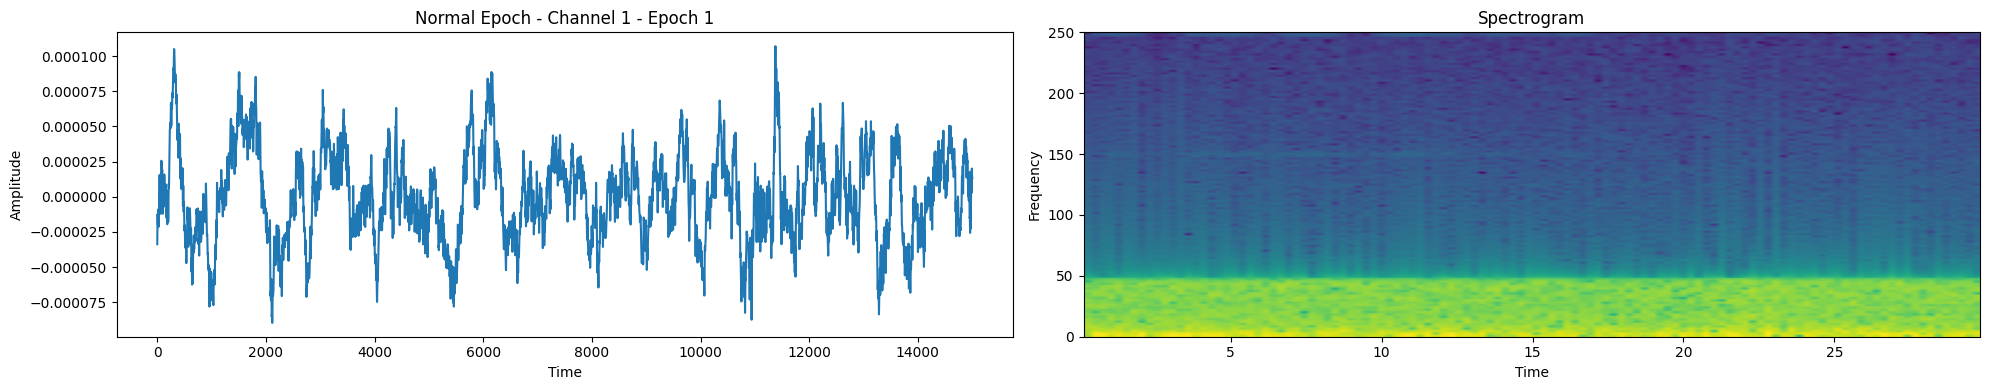

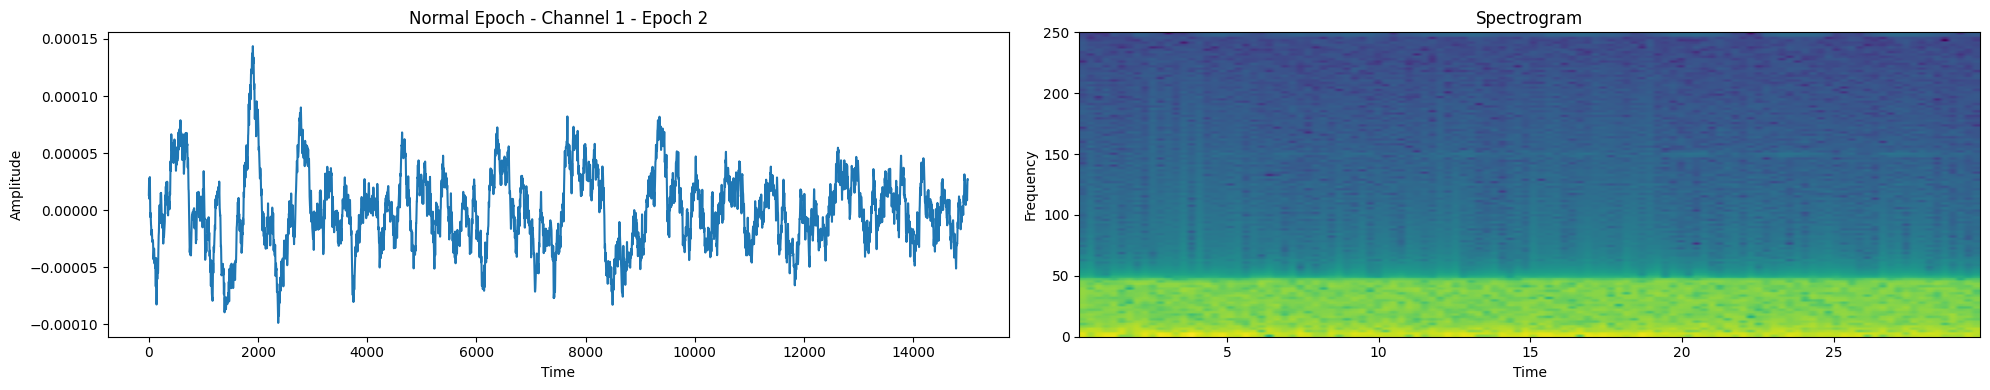

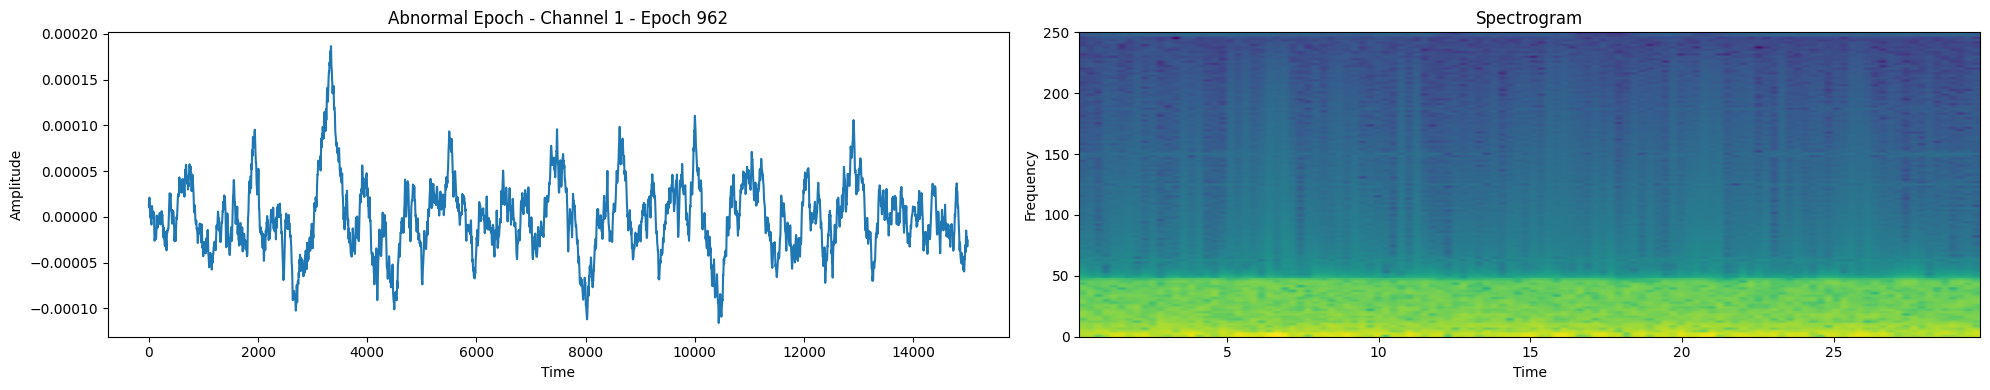

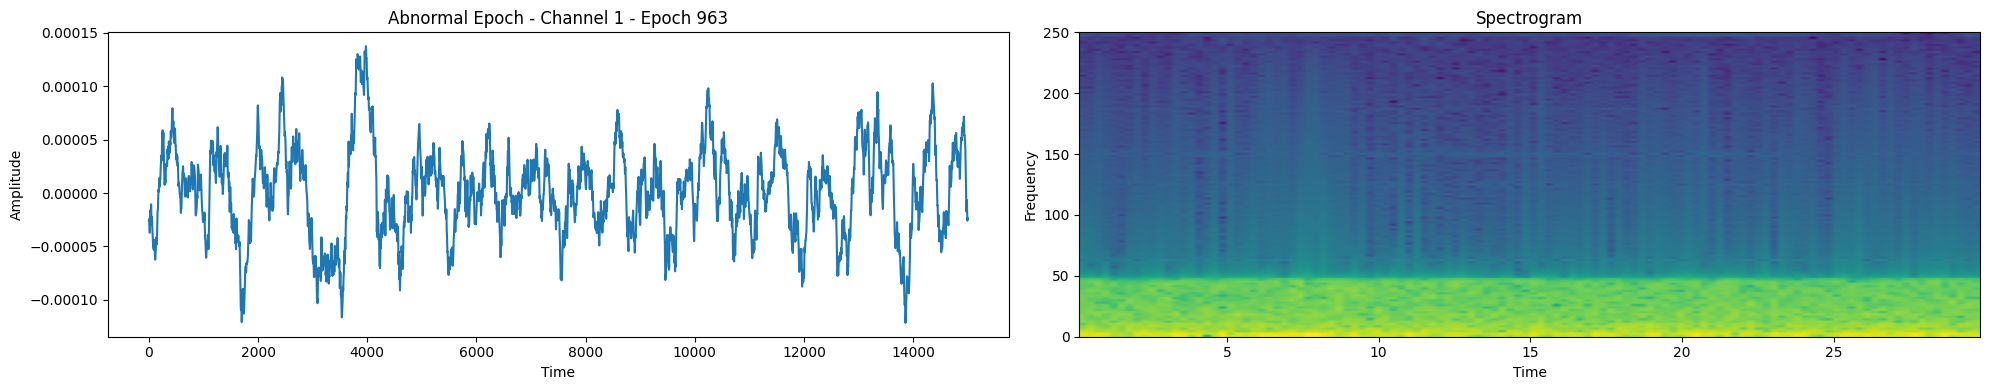

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'spectrograms' contains the transformed data and 'all_labels' contains the corresponding labels

num_epochs_to_visualize = 2# Number of epochs to visualize
num_epochs_to_visualize_per_category = 2

# Find indices of epochs labeled as 'Normal' and 'Alzheimer's/Dementia'
# Get indices of epochs for normal and Alzheimer's categories
normal_indices = [idx for idx, label in enumerate(encoded_labels) if label == 0][:num_epochs_to_visualize_per_category]
abnormal_indices = [idx for idx, label in enumerate(encoded_labels) if label == 1][:num_epochs_to_visualize_per_category]
# Visualize the raw EEG data for the specified epochs of each type

epochs_to_visualize = normal_indices[:num_epochs_to_visualize] + abnormal_indices[:num_epochs_to_visualize]

for epoch_idx in epochs_to_visualize:
    plt.figure(figsize=(20, 4))

    # Plotting the raw EEG data
    plt.subplot(121)
    plt.plot(all_epochs_array_cleaned[epoch_idx][0])  # Plotting the first channel's raw EEG data
    if epoch_idx in normal_indices:
        plt.title(f'Normal Epoch - Channel 1 - Epoch {epoch_idx+1}')
    else:
        plt.title(f'Abnormal Epoch - Channel 1 - Epoch {epoch_idx+1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Plotting the spectrogram
    plt.subplot(122)
    plt.specgram(all_epochs_array_cleaned[epoch_idx][0], Fs=500)  # Assuming 'sample_rate' is defined
    plt.title('Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'spectrograms' contains the transformed data and 'all_labels' contains the corresponding labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spectrograms_cleaned, encoded_labels_cleaned, test_size=0.2, random_state=42)


# Normalize spectrograms
X_train = X_train / np.max(X_train)
X_test = X_test / np.max(X_test)


# Define the CNN model
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(spectrograms_cleaned.shape[1], spectrograms_cleaned.shape[2], spectrograms_cleaned.shape[3])),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes: Alzheimer's, Normal, Dementia
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

predictions = model.predict(X_test)

# Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate the classification report
report = classification_report(y_test, predicted_labels)
print("Classification Report:\n", report)

Epoch 1/20
56/56 [==============================] - 4s 38ms/step - loss: 1.0627 - accuracy: 0.4206 - val_loss: 1.0857 - val_accuracy: 0.4482
Epoch 2/20
56/56 [==============================] - 1s 15ms/step - loss: 1.0366 - accuracy: 0.4617 - val_loss: 1.0732 - val_accuracy: 0.3829
Epoch 3/20
56/56 [==============================] - 1s 14ms/step - loss: 0.9583 - accuracy: 0.5586 - val_loss: 1.0248 - val_accuracy: 0.5135
Epoch 4/20
56/56 [==============================] - 1s 15ms/step - loss: 0.9128 - accuracy: 0.5901 - val_loss: 0.9875 - val_accuracy: 0.5293
Epoch 5/20
56/56 [==============================] - 1s 14ms/step - loss: 0.8864 - accuracy: 0.6115 - val_loss: 0.9648 - val_accuracy: 0.5631
Epoch 6/20
56/56 [==============================] - 1s 14ms/step - loss: 0.8488 - accuracy: 0.6312 - val_loss: 0.9844 - val_accuracy: 0.5495
Epoch 7/20
56/56 [==============================] - 1s 14ms/step - loss: 0.8383 - accuracy: 0.6323 - val_loss: 0.9239 - val_accuracy: 0.5698
Epoch 8/20
56

# lstm network

In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'all_epochs_array' contains the EEG data and 'all_labels' contains the corresponding labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_epochs_array, encoded_labels, test_size=0.2, random_state=42)

# Reshape the data to fit the RNN input shape (epochs, timepoints, channels)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[2], X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2], X_test.shape[1]))

# Define the RNN model using LSTM cells
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes: Alzheimer's, Normal, Dementia
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")
predictions = model.predict(X_test)

# Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate the classification report
report = classification_report(y_test, predicted_labels)
print("Classification Report:\n", report)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/10
28/28 [==============================] - 42s 1s/step - loss: 1.0748 - accuracy: 0.4235 - val_loss: 1.0551 - val_accuracy: 0.4365
Epoch 2/10
28/28 [==============================] - 33s 1s/step - loss: 1.0650 - accuracy: 0.4269 - val_loss: 1.0490 - val_accuracy: 0.4365
Epoch 3/10
28/28 [==============================] - 33s 1s/step - loss: 1.0661 - accuracy: 0.4269 - val_loss: 1.0563 - val_accuracy: 0.4365
Epoch 4/10
28/28 [==============================] - 33s 1s/step - loss: 1.0653 - accuracy: 0.4269 - val_loss: 1.0490 - val_accuracy: 0.4365
Epoch 5/10
28/28 [==============================] - 32s 1s/step - loss: 1.0649 - accuracy: 0.4269 - val_loss: 1.0510 - val_accuracy: 0.4365
Epoch 6/10
28/28 [==============================] - 33s 1s/step - loss: 1.0651 - accuracy: 0.4269 - val_loss: 1.0514 - val_accuracy: 0.4365
Epoch 7/10
28/28 [==============================] - 33s 1s/step - loss: 1.0650 - accuracy: 0.4269 - val_loss: 1.0491 - val_accuracy: 0.4365
Epoch 8/10
28/28 [==

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'all_epochs_array' contains the EEG data and 'all_labels' contains the corresponding labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_epochs_array_cleaned, encoded_labels_cleaned, test_size=0.2, random_state=42)

# Reshape the data to fit the RNN input shape (epochs, timepoints, channels)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[2], X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2], X_test.shape[1]))

# Define the RNN model using LSTM cells
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes: Alzheimer's, Normal, Dementia
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")
predictions = model.predict(X_test)

# Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate the classification report
report = classification_report(y_test, predicted_labels)
print("Classification Report:\n", report)

Epoch 1/10
28/28 [==============================] - 39s 1s/step - loss: 1.0731 - accuracy: 0.4167 - val_loss: 1.0767 - val_accuracy: 0.4414
Epoch 2/10
28/28 [==============================] - 32s 1s/step - loss: 1.0581 - accuracy: 0.4262 - val_loss: 1.0811 - val_accuracy: 0.4414
Epoch 3/10
28/28 [==============================] - 32s 1s/step - loss: 1.0590 - accuracy: 0.4262 - val_loss: 1.0770 - val_accuracy: 0.4414
Epoch 4/10
28/28 [==============================] - 32s 1s/step - loss: 1.0606 - accuracy: 0.4262 - val_loss: 1.0821 - val_accuracy: 0.4414
Epoch 5/10
28/28 [==============================] - 32s 1s/step - loss: 1.0593 - accuracy: 0.4262 - val_loss: 1.0827 - val_accuracy: 0.4414
Epoch 6/10
28/28 [==============================] - 32s 1s/step - loss: 1.0588 - accuracy: 0.4262 - val_loss: 1.0790 - val_accuracy: 0.4414
Epoch 7/10
28/28 [==============================] - 32s 1s/step - loss: 1.0584 - accuracy: 0.4262 - val_loss: 1.0803 - val_accuracy: 0.4414
Epoch 8/10
28/28 [==

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
